In [51]:
import pandas as pd
import numpy as np
dt=pd.read_csv('Lung.csv')
print(dt)

     Patient_ID  Age  Gender  Smoking_Status Residence Air_Pollution_Exposure  \
0      BD-00001   84    Male   Former Smoker     Urban               Moderate   
1      BD-00002   34  Female  Current Smoker     Urban                    Low   
2      BD-00003   45    Male    Never Smoked     Urban                   High   
3      BD-00004   47  Female   Former Smoker     Urban               Moderate   
4      BD-00005   78    Male    Never Smoked     Rural                   High   
...         ...  ...     ...             ...       ...                    ...   
4995   BD-04996   51    Male  Current Smoker     Rural               Moderate   
4996   BD-04997   69    Male  Current Smoker     Urban               Moderate   
4997   BD-04998   52    Male   Former Smoker     Rural                   High   
4998   BD-04999   78  Female  Current Smoker     Rural                   High   
4999   BD-05000   33  Female  Current Smoker     Rural                    Low   

     Biomass_Fuel_Use Facto

In [52]:
pd.DataFrame(dt)
print(dt)

     Patient_ID  Age  Gender  Smoking_Status Residence Air_Pollution_Exposure  \
0      BD-00001   84    Male   Former Smoker     Urban               Moderate   
1      BD-00002   34  Female  Current Smoker     Urban                    Low   
2      BD-00003   45    Male    Never Smoked     Urban                   High   
3      BD-00004   47  Female   Former Smoker     Urban               Moderate   
4      BD-00005   78    Male    Never Smoked     Rural                   High   
...         ...  ...     ...             ...       ...                    ...   
4995   BD-04996   51    Male  Current Smoker     Rural               Moderate   
4996   BD-04997   69    Male  Current Smoker     Urban               Moderate   
4997   BD-04998   52    Male   Former Smoker     Rural                   High   
4998   BD-04999   78  Female  Current Smoker     Rural                   High   
4999   BD-05000   33  Female  Current Smoker     Rural                    Low   

     Biomass_Fuel_Use Facto

In [53]:
# Check for missing values in the dataset
missing_values = dt.isnull().sum()

# Display the count of missing values for each column
print("\nMissing Values in Each Column:")
print(missing_values)

# Get total number of missing values
total_missing = dt.isnull().sum().sum()
print(f"\nTotal number of missing values in the dataset: {total_missing}")

# Display rows with any missing values
print("\nRows containing missing values:")
print(dt[dt.isnull().any(axis=1)])



Missing Values in Each Column:
Patient_ID                0
Age                       0
Gender                    0
Smoking_Status            0
Residence                 0
Air_Pollution_Exposure    0
Biomass_Fuel_Use          0
Factory_Exposure          0
Family_History            0
Diet_Habit                0
Symptoms                  0
Tumor_Size_mm             0
Histology_Type            0
Stage                     0
Treatment                 0
Hospital_Type             0
Survival_1_Year           0
dtype: int64

Total number of missing values in the dataset: 0

Rows containing missing values:
Empty DataFrame
Columns: [Patient_ID, Age, Gender, Smoking_Status, Residence, Air_Pollution_Exposure, Biomass_Fuel_Use, Factory_Exposure, Family_History, Diet_Habit, Symptoms, Tumor_Size_mm, Histology_Type, Stage, Treatment, Hospital_Type, Survival_1_Year]
Index: []


In [54]:
from scipy import stats

# Calculate Z-scores for numerical columns
numerical_columns = dt.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(dt[numerical_columns]))

# Define threshold (commonly used is 3)
threshold = 3

# Find outliers using Z-score method
outliers = (z_scores > threshold).any(axis=1)

# Display number of outliers found
print(f"\nNumber of rows with outliers: {outliers.sum()}")

# Display rows containing outliers
print("\nRows containing outliers (Z-score > 3):")
print(dt[outliers])

# Show which columns contain outliers
print("\nNumber of outliers in each numerical column:")
for column in numerical_columns:
    num_outliers = (np.abs(stats.zscore(dt[column])) > threshold).sum()
    print(f"{column}: {num_outliers} outliers")



Number of rows with outliers: 0

Rows containing outliers (Z-score > 3):
Empty DataFrame
Columns: [Patient_ID, Age, Gender, Smoking_Status, Residence, Air_Pollution_Exposure, Biomass_Fuel_Use, Factory_Exposure, Family_History, Diet_Habit, Symptoms, Tumor_Size_mm, Histology_Type, Stage, Treatment, Hospital_Type, Survival_1_Year]
Index: []

Number of outliers in each numerical column:
Age: 0 outliers
Tumor_Size_mm: 0 outliers


In [55]:
# Detect outliers using IQR method
Q1 = dt[numerical_columns].quantile(0.25)
Q3 = dt[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers using IQR method
iqr_outliers = ((dt[numerical_columns] < lower_bound) | (dt[numerical_columns] > upper_bound)).any(axis=1)

# Display number of outliers found using IQR method
print(f"\nNumber of rows with outliers (IQR method): {iqr_outliers.sum()}")

# Display rows containing outliers
print("\nRows containing outliers (IQR method):")
print(dt[iqr_outliers])

# Show which columns contain outliers
print("\nNumber of outliers in each numerical column (IQR method):")
for column in numerical_columns:
    num_outliers = ((dt[column] < lower_bound[column]) | (dt[column] > upper_bound[column])).sum()
    print(f"{column}: {num_outliers} outliers")



Number of rows with outliers (IQR method): 0

Rows containing outliers (IQR method):
Empty DataFrame
Columns: [Patient_ID, Age, Gender, Smoking_Status, Residence, Air_Pollution_Exposure, Biomass_Fuel_Use, Factory_Exposure, Family_History, Diet_Habit, Symptoms, Tumor_Size_mm, Histology_Type, Stage, Treatment, Hospital_Type, Survival_1_Year]
Index: []

Number of outliers in each numerical column (IQR method):
Age: 0 outliers
Tumor_Size_mm: 0 outliers


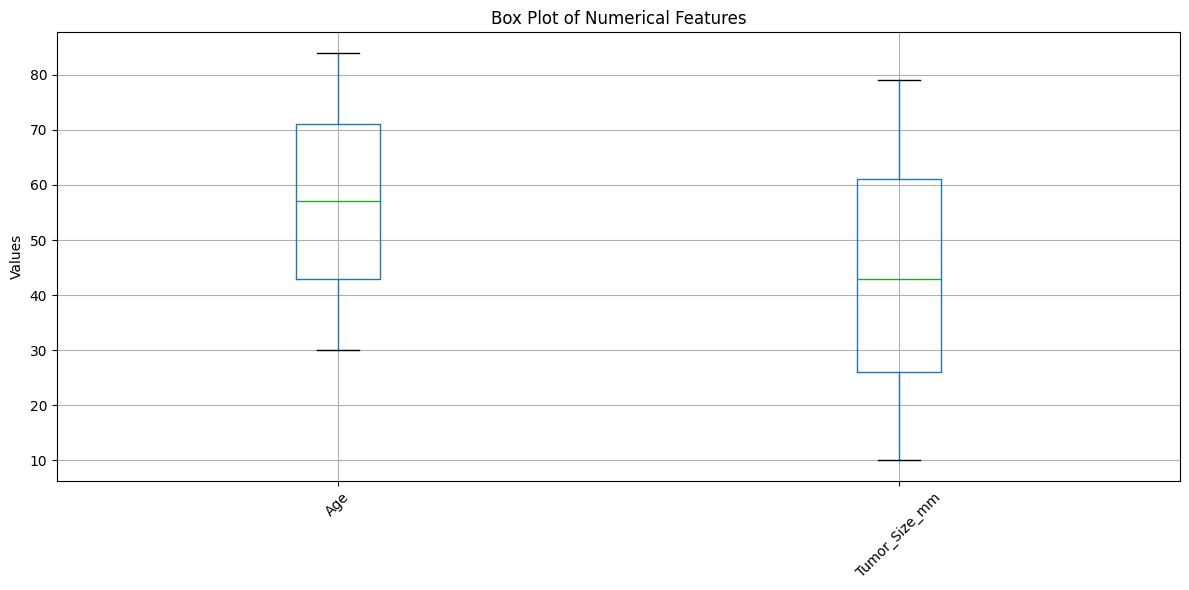

In [56]:

import matplotlib.pyplot as plt

# Create box plot for numerical columns
plt.figure(figsize=(12, 6))
dt[numerical_columns].boxplot()
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [57]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('Lung.csv')
profile = ProfileReport(df, title="Profiling Report")

# Produce the data profiling report
original_report = ProfileReport(df, title='Original Data')
original_report.to_file("original_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 138.23it/s]


In [58]:
# Drop specified columns
columns_to_drop = ['Histology_Type', 'Symptoms', 'Diet_Habit', 'Patient_ID']
df = df.drop(columns=columns_to_drop)

print("\nColumns dropped:", columns_to_drop)
print("Remaining columns:", df.columns.tolist())




Columns dropped: ['Histology_Type', 'Symptoms', 'Diet_Habit', 'Patient_ID']
Remaining columns: ['Age', 'Gender', 'Smoking_Status', 'Residence', 'Air_Pollution_Exposure', 'Biomass_Fuel_Use', 'Factory_Exposure', 'Family_History', 'Tumor_Size_mm', 'Stage', 'Treatment', 'Hospital_Type', 'Survival_1_Year']


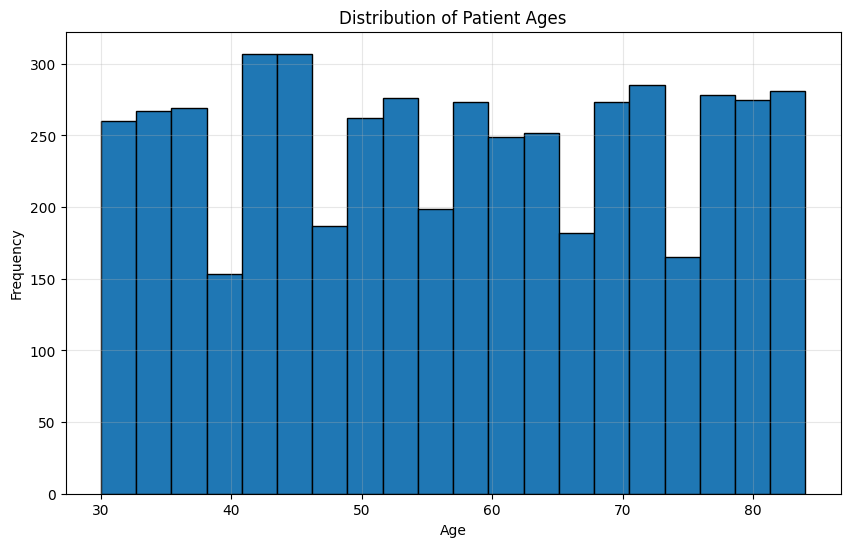

In [59]:
# Create histogram for patient age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


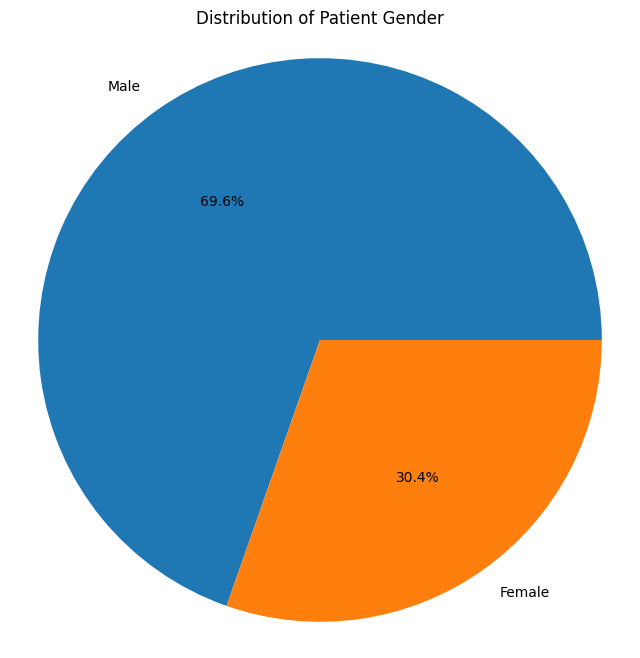

In [60]:
# Create pie chart for gender distribution
plt.figure(figsize=(8, 8))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Patient Gender')
plt.axis('equal')
plt.show()


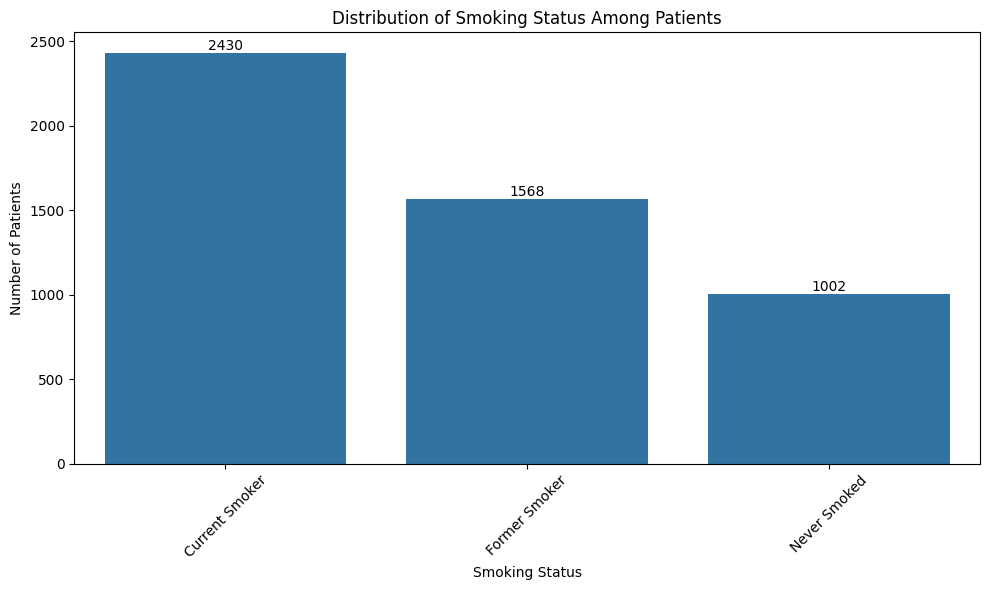

In [61]:
import seaborn as sns
# Create visualization for smoking status distribution
plt.figure(figsize=(10, 6))
smoking_counts = df['Smoking_Status'].value_counts()

# Create bar plot
sns.barplot(x=smoking_counts.index, y=smoking_counts.values)

plt.title('Distribution of Smoking Status Among Patients')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Patients')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(smoking_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

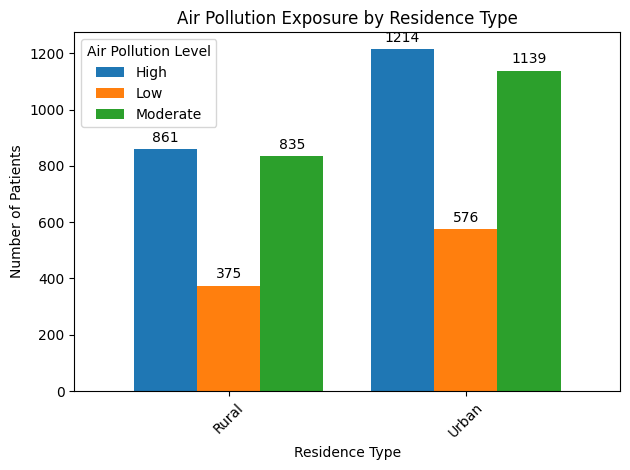

In [62]:
# Create visualization for Residence and Air Pollution Exposure
plt.figure(figsize=(10, 6))

# Get value counts for both variables
residence_pollution = df.groupby(['Residence', 'Air_Pollution_Exposure']).size().unstack()

# Create grouped bar plot
residence_pollution.plot(kind='bar', width=0.8)

plt.title('Air Pollution Exposure by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Number of Patients')

# Add legend
plt.legend(title='Air Pollution Level')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value labels on top of each bar
for container in plt.gca().containers:
    plt.bar_label(container, padding=3)

plt.tight_layout()
plt.show()


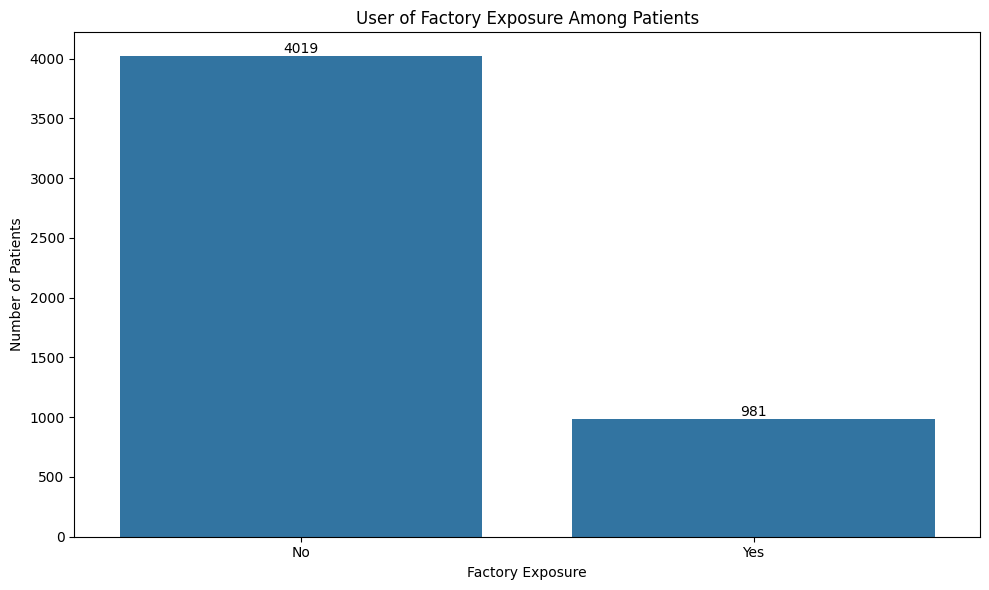

In [63]:
# Create visualization for Factory Exposure distribution
plt.figure(figsize=(10, 6))

# Get value counts for Factory Exposure
factory_counts = df['Factory_Exposure'].value_counts()

# Create bar plot
sns.barplot(x=factory_counts.index, y=factory_counts.values)

plt.title('User of Factory Exposure Among Patients')
plt.xlabel('Factory Exposure')
plt.ylabel('Number of Patients')

# Add value labels on top of each bar
for i, v in enumerate(factory_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


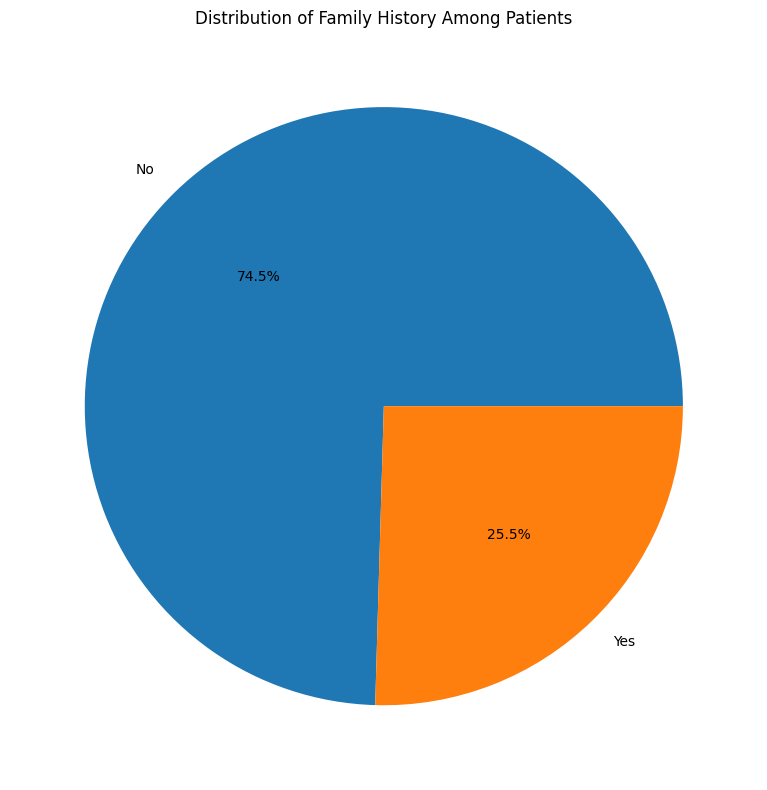

In [64]:
# Create visualization for Family History distribution
plt.figure(figsize=(8, 8))

# Get value counts for Family History
family_history_counts = df['Family_History'].value_counts()

# Create pie chart
plt.pie(family_history_counts.values, labels=family_history_counts.index, autopct='%1.1f%%')

plt.title('Distribution of Family History Among Patients')

plt.tight_layout()
plt.show()


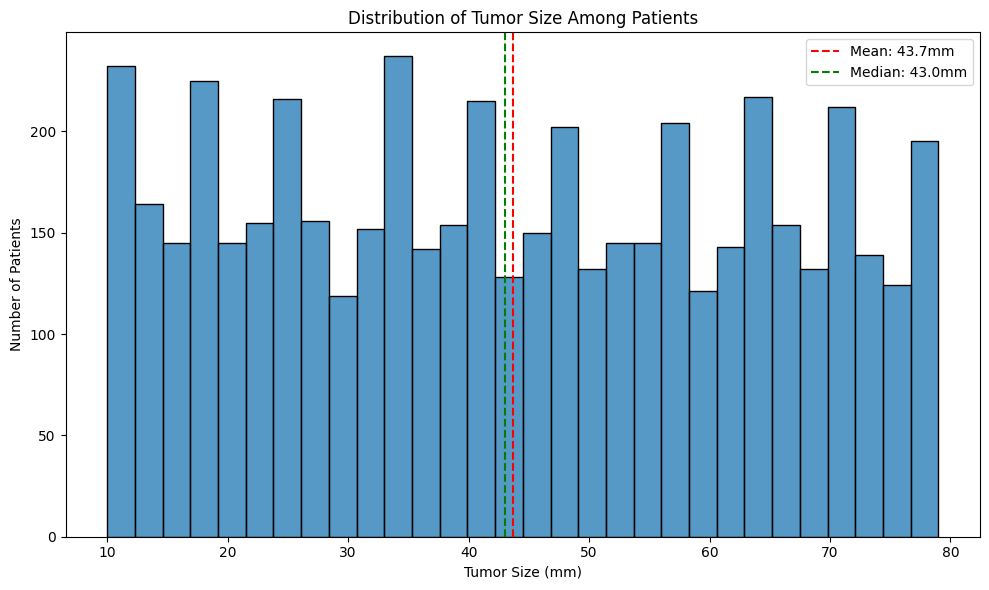

In [65]:
# Create visualization for Tumor Size distribution
plt.figure(figsize=(10, 6))

# Create histogram for Tumor Size
sns.histplot(data=df, x='Tumor_Size_mm', bins=30)

plt.title('Distribution of Tumor Size Among Patients')
plt.xlabel('Tumor Size (mm)')
plt.ylabel('Number of Patients')

# Add mean and median lines
plt.axvline(df['Tumor_Size_mm'].mean(), color='red', linestyle='--', label=f'Mean: {df["Tumor_Size_mm"].mean():.1f}mm')
plt.axvline(df['Tumor_Size_mm'].median(), color='green', linestyle='--', label=f'Median: {df["Tumor_Size_mm"].median():.1f}mm')

plt.legend()
plt.tight_layout()
plt.show()


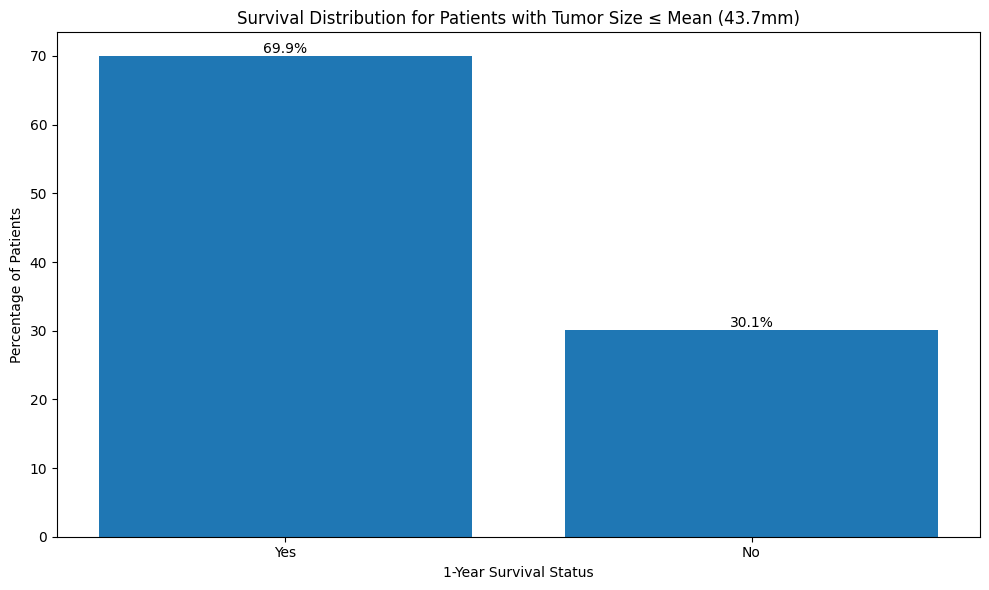

In [66]:
# Calculate mean tumor size
mean_tumor_size = df['Tumor_Size_mm'].mean()

# Create a subset of patients with tumor size up to mean
patients_up_to_mean = df[df['Tumor_Size_mm'] <= mean_tumor_size]

# Calculate survival percentage for this subset
survival_count = patients_up_to_mean['Survival_1_Year'].value_counts()
survival_percentage = (survival_count / len(patients_up_to_mean)) * 100

# Create visualization
plt.figure(figsize=(10, 6))

# Create bar plot
bars = plt.bar(survival_count.index, survival_percentage)

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.title(f'Survival Distribution for Patients with Tumor Size ≤ Mean ({mean_tumor_size:.1f}mm)')
plt.xlabel('1-Year Survival Status')
plt.ylabel('Percentage of Patients')

plt.tight_layout()
plt.show()


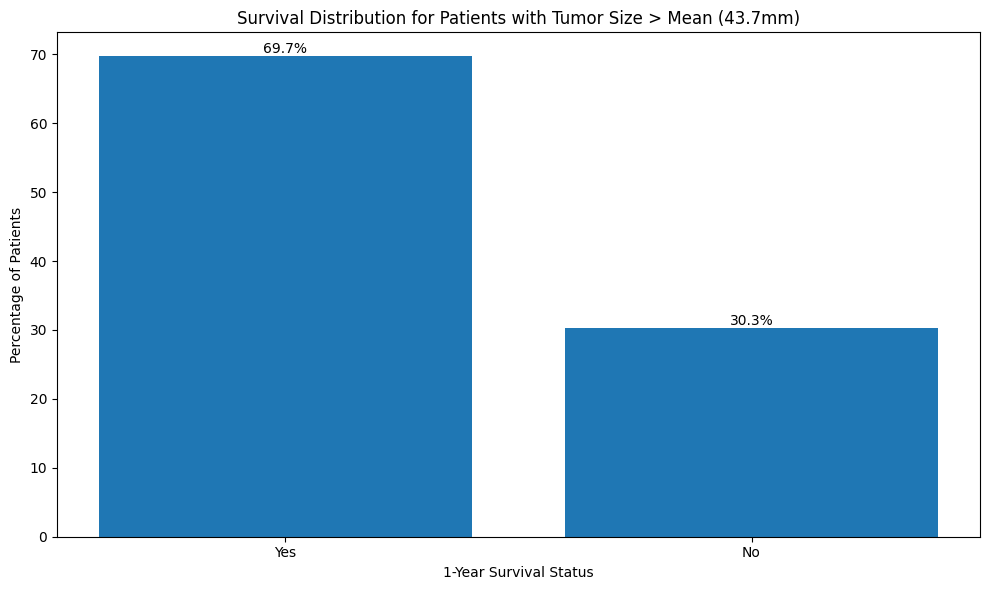

In [67]:
# Create a subset of patients with tumor size above mean
patients_above_mean = df[df['Tumor_Size_mm'] > mean_tumor_size]

# Calculate survival percentage for this subset
survival_count_above = patients_above_mean['Survival_1_Year'].value_counts()
survival_percentage_above = (survival_count_above / len(patients_above_mean)) * 100

# Create visualization
plt.figure(figsize=(10, 6))

# Create bar plot
bars = plt.bar(survival_count_above.index, survival_percentage_above)

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.title(f'Survival Distribution for Patients with Tumor Size > Mean ({mean_tumor_size:.1f}mm)')
plt.xlabel('1-Year Survival Status')
plt.ylabel('Percentage of Patients')

plt.tight_layout()
plt.show()



<Axes: >

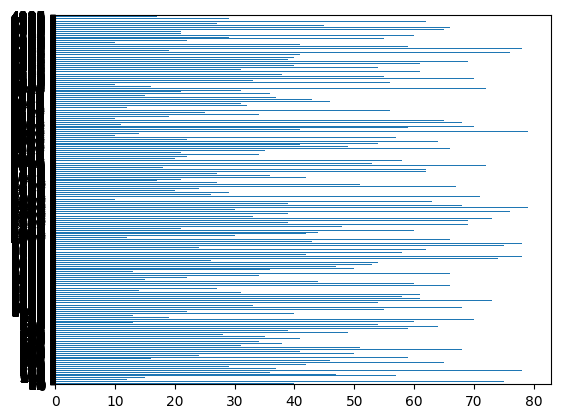

In [68]:
dt.Tumor_Size_mm.plot.barh()


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     5000 non-null   int64 
 1   Gender                  5000 non-null   object
 2   Smoking_Status          5000 non-null   object
 3   Residence               5000 non-null   object
 4   Air_Pollution_Exposure  5000 non-null   object
 5   Biomass_Fuel_Use        5000 non-null   object
 6   Factory_Exposure        5000 non-null   object
 7   Family_History          5000 non-null   object
 8   Tumor_Size_mm           5000 non-null   int64 
 9   Stage                   5000 non-null   object
 10  Treatment               5000 non-null   object
 11  Hospital_Type           5000 non-null   object
 12  Survival_1_Year         5000 non-null   object
dtypes: int64(2), object(11)
memory usage: 507.9+ KB


In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Smoking_Status'] = le.fit_transform(df['Smoking_Status'])
df['Air_Pollution_Exposure'] = le.fit_transform(df['Air_Pollution_Exposure'])
df['Factory_Exposure'] = le.fit_transform(df['Factory_Exposure'])
df['Family_History'] = le.fit_transform(df['Family_History'])
df['Survival_1_Year'] = le.fit_transform(df['Survival_1_Year'])
df['Biomass_Fuel_Use'] = le.fit_transform(df['Biomass_Fuel_Use'])
df




,Age,Gender,Smoking_Status,Residence,Air_Pollution_Exposure,Biomass_Fuel_Use,Factory_Exposure,Family_History,Tumor_Size_mm,Stage,Treatment,Hospital_Type,Survival_1_Year
0,84,1,1,Urban,2,0,1,0,21,Stage I,Chemotherapy,Private,1
1,34,0,0,Urban,1,1,0,0,41,Stage II,Targeted Therapy,Government,1
2,45,1,2,Urban,0,0,0,0,43,Stage III,Surgery,Government,0
3,47,0,1,Urban,2,0,1,0,21,Stage I,Targeted Therapy,Government,1
4,78,1,2,Rural,0,1,0,0,13,Stage III,Chemotherapy,Medical College,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,51,1,0,Rural,2,0,0,0,17,Stage IV,Targeted Therapy,Government,1
4996,69,1,0,Urban,2,0,0,1,64,Stage III,Chemotherapy,Private,1
4997,52,1,1,Rural,0,1,0,0,52,Stage III,Radiation,Medical College,1
4998,78,0,0,Rural,0,0,0,0,32,Stage III,Chemotherapy,Government,0


In [71]:
df = df.drop('Hospital_Type', axis=1)
df

,Age,Gender,Smoking_Status,Residence,Air_Pollution_Exposure,Biomass_Fuel_Use,Factory_Exposure,Family_History,Tumor_Size_mm,Stage,Treatment,Survival_1_Year
0,84,1,1,Urban,2,0,1,0,21,Stage I,Chemotherapy,1
1,34,0,0,Urban,1,1,0,0,41,Stage II,Targeted Therapy,1
2,45,1,2,Urban,0,0,0,0,43,Stage III,Surgery,0
3,47,0,1,Urban,2,0,1,0,21,Stage I,Targeted Therapy,1
4,78,1,2,Rural,0,1,0,0,13,Stage III,Chemotherapy,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,51,1,0,Rural,2,0,0,0,17,Stage IV,Targeted Therapy,1
4996,69,1,0,Urban,2,0,0,1,64,Stage III,Chemotherapy,1
4997,52,1,1,Rural,0,1,0,0,52,Stage III,Radiation,1
4998,78,0,0,Rural,0,0,0,0,32,Stage III,Chemotherapy,0


In [72]:
df = pd.get_dummies(df, columns=['Residence', 'Stage'])

df

,Age,Gender,Smoking_Status,Air_Pollution_Exposure,Biomass_Fuel_Use,Factory_Exposure,Family_History,Tumor_Size_mm,Treatment,Survival_1_Year,Residence_Rural,Residence_Urban,Stage_Stage I,Stage_Stage II,Stage_Stage III,Stage_Stage IV
0,84,1,1,2,0,1,0,21,Chemotherapy,1,False,True,True,False,False,False
1,34,0,0,1,1,0,0,41,Targeted Therapy,1,False,True,False,True,False,False
2,45,1,2,0,0,0,0,43,Surgery,0,False,True,False,False,True,False
3,47,0,1,2,0,1,0,21,Targeted Therapy,1,False,True,True,False,False,False
4,78,1,2,0,1,0,0,13,Chemotherapy,0,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,51,1,0,2,0,0,0,17,Targeted Therapy,1,True,False,False,False,False,True
4996,69,1,0,2,0,0,1,64,Chemotherapy,1,False,True,False,False,True,False
4997,52,1,1,0,1,0,0,52,Radiation,1,True,False,False,False,True,False
4998,78,0,0,0,0,0,0,32,Chemotherapy,0,True,False,False,False,True,False


In [73]:
df = df.replace({True: 1, False: 0})
df


C:\Users\User\AppData\Local\Temp\ipykernel_13840\2216527674.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,Age,Gender,Smoking_Status,Air_Pollution_Exposure,Biomass_Fuel_Use,Factory_Exposure,Family_History,Tumor_Size_mm,Treatment,Survival_1_Year,Residence_Rural,Residence_Urban,Stage_Stage I,Stage_Stage II,Stage_Stage III,Stage_Stage IV
0,84,1,1,2,0,1,0,21,Chemotherapy,1,0,1,1,0,0,0
1,34,0,0,1,1,0,0,41,Targeted Therapy,1,0,1,0,1,0,0
2,45,1,2,0,0,0,0,43,Surgery,0,0,1,0,0,1,0
3,47,0,1,2,0,1,0,21,Targeted Therapy,1,0,1,1,0,0,0
4,78,1,2,0,1,0,0,13,Chemotherapy,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,51,1,0,2,0,0,0,17,Targeted Therapy,1,1,0,0,0,0,1
4996,69,1,0,2,0,0,1,64,Chemotherapy,1,0,1,0,0,1,0
4997,52,1,1,0,1,0,0,52,Radiation,1,1,0,0,0,1,0
4998,78,0,0,0,0,0,0,32,Chemotherapy,0,1,0,0,0,1,0


In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Tumor_Size_mm'] = scaler.fit_transform(df[['Tumor_Size_mm']])
df


,Age,Gender,Smoking_Status,Air_Pollution_Exposure,Biomass_Fuel_Use,Factory_Exposure,Family_History,Tumor_Size_mm,Treatment,Survival_1_Year,Residence_Rural,Residence_Urban,Stage_Stage I,Stage_Stage II,Stage_Stage III,Stage_Stage IV
0,84,1,1,2,0,1,0,0.159420,Chemotherapy,1,0,1,1,0,0,0
1,34,0,0,1,1,0,0,0.449275,Targeted Therapy,1,0,1,0,1,0,0
2,45,1,2,0,0,0,0,0.478261,Surgery,0,0,1,0,0,1,0
3,47,0,1,2,0,1,0,0.159420,Targeted Therapy,1,0,1,1,0,0,0
4,78,1,2,0,1,0,0,0.043478,Chemotherapy,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,51,1,0,2,0,0,0,0.101449,Targeted Therapy,1,1,0,0,0,0,1
4996,69,1,0,2,0,0,1,0.782609,Chemotherapy,1,0,1,0,0,1,0
4997,52,1,1,0,1,0,0,0.608696,Radiation,1,1,0,0,0,1,0
4998,78,0,0,0,0,0,0,0.318841,Chemotherapy,0,1,0,0,0,1,0


In [75]:
df = pd.get_dummies(df, columns=['Treatment'])
df = df.replace({True: 1, False: 0})
df



C:\Users\User\AppData\Local\Temp\ipykernel_13840\761954983.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,Age,Gender,Smoking_Status,Air_Pollution_Exposure,Biomass_Fuel_Use,Factory_Exposure,Family_History,Tumor_Size_mm,Survival_1_Year,Residence_Rural,Residence_Urban,Stage_Stage I,Stage_Stage II,Stage_Stage III,Stage_Stage IV,Treatment_Chemotherapy,Treatment_Palliative Care,Treatment_Radiation,Treatment_Surgery,Treatment_Targeted Therapy
0,84,1,1,2,0,1,0,0.159420,1,0,1,1,0,0,0,1,0,0,0,0
1,34,0,0,1,1,0,0,0.449275,1,0,1,0,1,0,0,0,0,0,0,1
2,45,1,2,0,0,0,0,0.478261,0,0,1,0,0,1,0,0,0,0,1,0
3,47,0,1,2,0,1,0,0.159420,1,0,1,1,0,0,0,0,0,0,0,1
4,78,1,2,0,1,0,0,0.043478,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,51,1,0,2,0,0,0,0.101449,1,1,0,0,0,0,1,0,0,0,0,1
4996,69,1,0,2,0,0,1,0.782609,1,0,1,0,0,1,0,1,0,0,0,0
4997,52,1,1,0,1,0,0,0.608696,1,1,0,0,0,1,0,0,0,1,0,0
4998,78,0,0,0,0,0,0,0.318841,0,1,0,0,0,1,0,1,0,0,0,0


In [76]:
# Normalize Age using MinMaxScaler
df['Age'] = scaler.fit_transform(df[['Age']])


In [77]:
df

,Age,Gender,Smoking_Status,Air_Pollution_Exposure,Biomass_Fuel_Use,Factory_Exposure,Family_History,Tumor_Size_mm,Survival_1_Year,Residence_Rural,Residence_Urban,Stage_Stage I,Stage_Stage II,Stage_Stage III,Stage_Stage IV,Treatment_Chemotherapy,Treatment_Palliative Care,Treatment_Radiation,Treatment_Surgery,Treatment_Targeted Therapy
0,1.000000,1,1,2,0,1,0,0.159420,1,0,1,1,0,0,0,1,0,0,0,0
1,0.074074,0,0,1,1,0,0,0.449275,1,0,1,0,1,0,0,0,0,0,0,1
2,0.277778,1,2,0,0,0,0,0.478261,0,0,1,0,0,1,0,0,0,0,1,0
3,0.314815,0,1,2,0,1,0,0.159420,1,0,1,1,0,0,0,0,0,0,0,1
4,0.888889,1,2,0,1,0,0,0.043478,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.388889,1,0,2,0,0,0,0.101449,1,1,0,0,0,0,1,0,0,0,0,1
4996,0.722222,1,0,2,0,0,1,0.782609,1,0,1,0,0,1,0,1,0,0,0,0
4997,0.407407,1,1,0,1,0,0,0.608696,1,1,0,0,0,1,0,0,0,1,0,0
4998,0.888889,0,0,0,0,0,0,0.318841,0,1,0,0,0,1,0,1,0,0,0,0


In [78]:
df

,Age,Gender,Smoking_Status,Air_Pollution_Exposure,Biomass_Fuel_Use,Factory_Exposure,Family_History,Tumor_Size_mm,Survival_1_Year,Residence_Rural,Residence_Urban,Stage_Stage I,Stage_Stage II,Stage_Stage III,Stage_Stage IV,Treatment_Chemotherapy,Treatment_Palliative Care,Treatment_Radiation,Treatment_Surgery,Treatment_Targeted Therapy
0,1.000000,1,1,2,0,1,0,0.159420,1,0,1,1,0,0,0,1,0,0,0,0
1,0.074074,0,0,1,1,0,0,0.449275,1,0,1,0,1,0,0,0,0,0,0,1
2,0.277778,1,2,0,0,0,0,0.478261,0,0,1,0,0,1,0,0,0,0,1,0
3,0.314815,0,1,2,0,1,0,0.159420,1,0,1,1,0,0,0,0,0,0,0,1
4,0.888889,1,2,0,1,0,0,0.043478,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.388889,1,0,2,0,0,0,0.101449,1,1,0,0,0,0,1,0,0,0,0,1
4996,0.722222,1,0,2,0,0,1,0.782609,1,0,1,0,0,1,0,1,0,0,0,0
4997,0.407407,1,1,0,1,0,0,0.608696,1,1,0,0,0,1,0,0,0,1,0,0
4998,0.888889,0,0,0,0,0,0,0.318841,0,1,0,0,0,1,0,1,0,0,0,0


In [79]:
# Drop Factory_Exposure column
df = df.drop('Factory_Exposure', axis=1)


In [80]:
df

,Age,Gender,Smoking_Status,Air_Pollution_Exposure,Biomass_Fuel_Use,Family_History,Tumor_Size_mm,Survival_1_Year,Residence_Rural,Residence_Urban,Stage_Stage I,Stage_Stage II,Stage_Stage III,Stage_Stage IV,Treatment_Chemotherapy,Treatment_Palliative Care,Treatment_Radiation,Treatment_Surgery,Treatment_Targeted Therapy
0,1.000000,1,1,2,0,0,0.159420,1,0,1,1,0,0,0,1,0,0,0,0
1,0.074074,0,0,1,1,0,0.449275,1,0,1,0,1,0,0,0,0,0,0,1
2,0.277778,1,2,0,0,0,0.478261,0,0,1,0,0,1,0,0,0,0,1,0
3,0.314815,0,1,2,0,0,0.159420,1,0,1,1,0,0,0,0,0,0,0,1
4,0.888889,1,2,0,1,0,0.043478,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.388889,1,0,2,0,0,0.101449,1,1,0,0,0,0,1,0,0,0,0,1
4996,0.722222,1,0,2,0,1,0.782609,1,0,1,0,0,1,0,1,0,0,0,0
4997,0.407407,1,1,0,1,0,0.608696,1,1,0,0,0,1,0,0,0,1,0,0
4998,0.888889,0,0,0,0,0,0.318841,0,1,0,0,0,1,0,1,0,0,0,0


In [81]:
# Drop specified columns
columns_to_drop = ['Air_Pollution_Exposure', 'Biomass_Fuel_Use', 'Family_History', 'Smoking_Status']
df = df.drop(columns_to_drop, axis=1)


In [82]:
df

,Age,Gender,Tumor_Size_mm,Survival_1_Year,Residence_Rural,Residence_Urban,Stage_Stage I,Stage_Stage II,Stage_Stage III,Stage_Stage IV,Treatment_Chemotherapy,Treatment_Palliative Care,Treatment_Radiation,Treatment_Surgery,Treatment_Targeted Therapy
0,1.000000,1,0.159420,1,0,1,1,0,0,0,1,0,0,0,0
1,0.074074,0,0.449275,1,0,1,0,1,0,0,0,0,0,0,1
2,0.277778,1,0.478261,0,0,1,0,0,1,0,0,0,0,1,0
3,0.314815,0,0.159420,1,0,1,1,0,0,0,0,0,0,0,1
4,0.888889,1,0.043478,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.388889,1,0.101449,1,1,0,0,0,0,1,0,0,0,0,1
4996,0.722222,1,0.782609,1,0,1,0,0,1,0,1,0,0,0,0
4997,0.407407,1,0.608696,1,1,0,0,0,1,0,0,0,1,0,0
4998,0.888889,0,0.318841,0,1,0,0,0,1,0,1,0,0,0,0


Explained Variance Ratio:
PC1: 0.1444
PC2: 0.1014
PC3: 0.0990
PC4: 0.0940
PC5: 0.0934

Cumulative Variance Explained: 0.5322


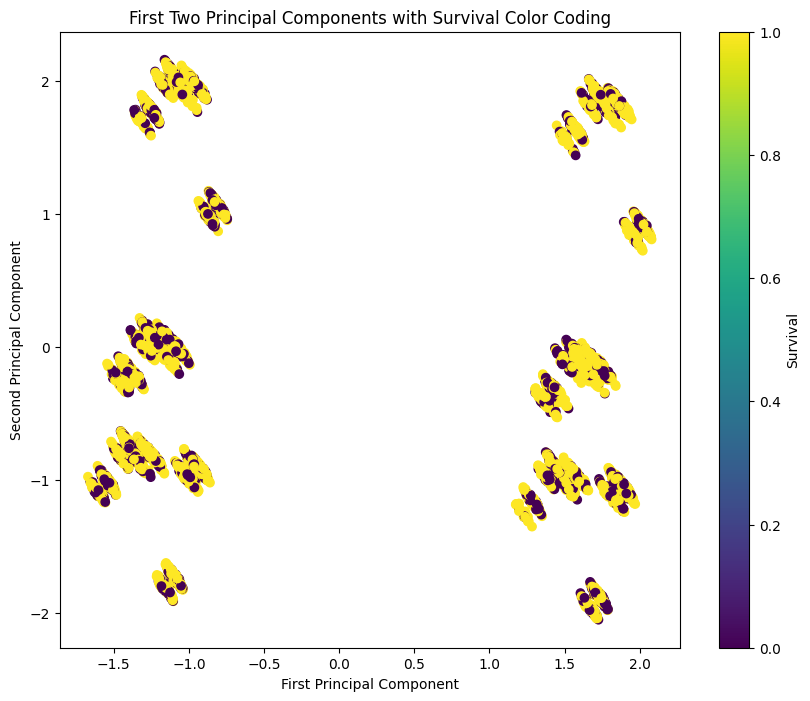

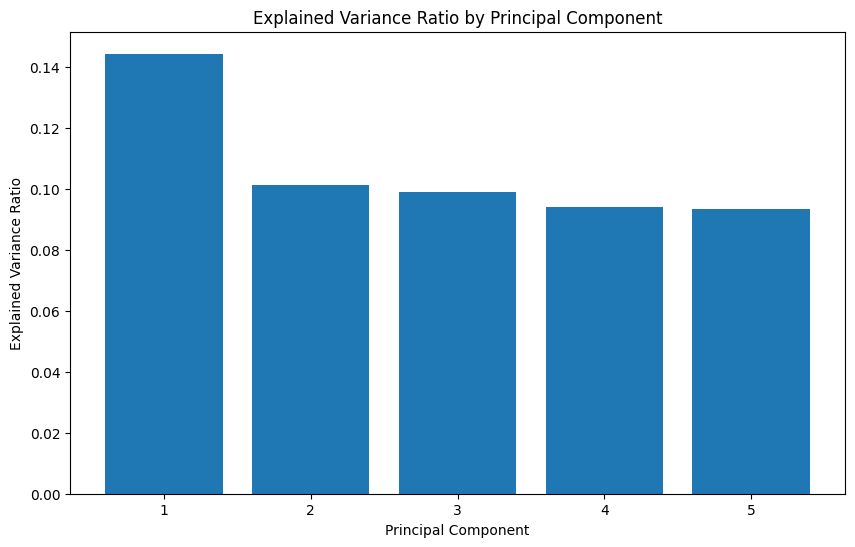

In [88]:
# Perform PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select features for PCA (excluding target variable)
features_for_pca = df.drop(['Survival_1_Year'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_pca)

# Apply PCA with 5 components
pca = PCA(n_components=5)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(
    data=pca_result,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
)

# Print explained variance ratio
print("Explained Variance Ratio:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")
print(f"\nCumulative Variance Explained: {sum(pca.explained_variance_ratio_):.4f}")

# Visualize first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['Survival_1_Year'], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First Two Principal Components with Survival Color Coding')
plt.colorbar(label='Survival')
plt.show()

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


In [91]:
# Prepare features for PCA
# Select numerical columns and encode categorical columns
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe
df_encoded = dt.copy()

# Encode categorical variables
categorical_columns = ['Gender', 'Smoking_Status', 'Residence', 'Air_Pollution_Exposure',
                      'Biomass_Fuel_Use', 'Factory_Exposure', 'Family_History', 'Diet_Habit',
                      'Symptoms', 'Histology_Type', 'Stage', 'Treatment', 'Hospital_Type',
                      'Survival_1_Year']

# Apply label encoding to categorical columns
le = LabelEncoder()
for column in categorical_columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

# Select features for PCA (excluding Patient_ID)
X = df_encoded.drop('Patient_ID', axis=1)

In [93]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()

In [100]:
# Define target variable
y = df['Survival_1_Year']

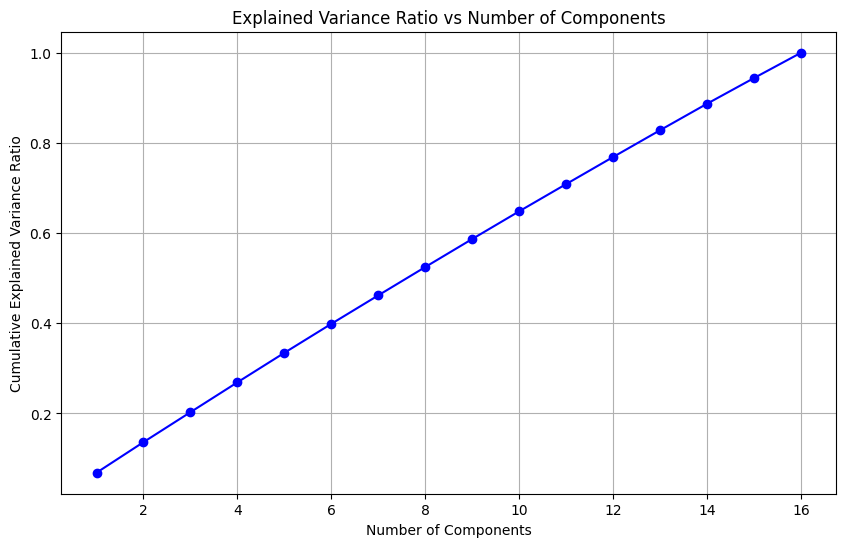

Number of components explaining 95% of variance: 16
KNN with PCA - Mean Accuracy: 0.9944 (+/- 0.0050)
Logistic Regression with PCA - Mean Accuracy: 1.0000 (+/- 0.0000)
Decision Tree with PCA - Mean Accuracy: 0.9212 (+/- 0.0294)
Random Forest with PCA - Mean Accuracy: 0.9984 (+/- 0.0024)


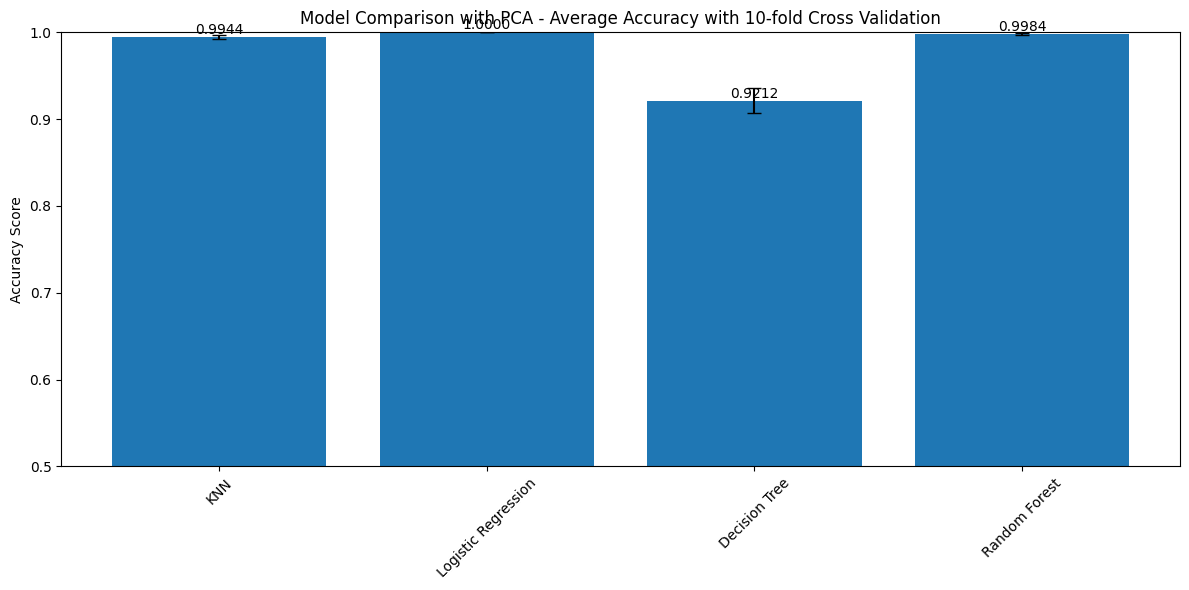

In [101]:
# Apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

# Select number of components that explain 95% of variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components explaining 95% of variance: {n_components}")

# Apply PCA with selected number of components
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)

# Initialize models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Perform 10-fold cross validation with PCA transformed data
mean_scores_pca = {}
std_scores_pca = {}
for name, model in models.items():
    scores = cross_val_score(model, X_pca_final, y, cv=10, scoring='accuracy')
    mean_scores_pca[name] = scores.mean()
    std_scores_pca[name] = scores.std()
    print(f"{name} with PCA - Mean Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Create bar plot for comparison
plt.figure(figsize=(12, 6))
models_names = list(mean_scores_pca.keys())
accuracy_scores = list(mean_scores_pca.values())
error = list(std_scores_pca.values())

# Create bar plot with error bars
bars = plt.bar(models_names, accuracy_scores, yerr=error, capsize=5)

# Customize the plot
plt.title('Model Comparison with PCA - Average Accuracy with 10-fold Cross Validation')
plt.ylabel('Accuracy Score')
plt.ylim(0.5, 1.0)  # Set y-axis limit from 0.5 to 1.0 for better visualization
plt.xticks(rotation=45)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


XGBoost - Mean Accuracy: 0.9996 (+/- 0.0016)
Voting Classifier - Mean Accuracy: 1.0000 (+/- 0.0000)


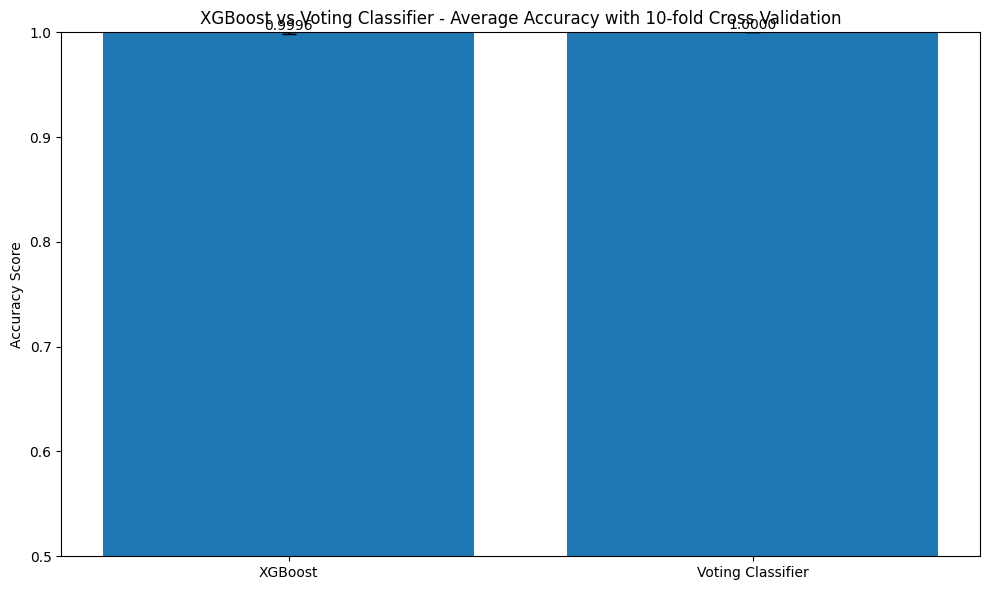

In [102]:

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
# Initialize XGBoost and Voting Classifier
xgb = XGBClassifier(random_state=42)
voting_clf = VotingClassifier(
    estimators=[
        ('knn', KNeighborsClassifier()),
        ('lr', LogisticRegression(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ],
    voting='hard'
)

# Perform 10-fold cross validation for XGBoost and Voting Classifier
models_comparison = {
    'XGBoost': xgb,
    'Voting Classifier': voting_clf
}

mean_scores_ensemble = {}
std_scores_ensemble = {}

for name, model in models_comparison.items():
    scores = cross_val_score(model, X_pca_final, y, cv=10, scoring='accuracy')
    mean_scores_ensemble[name] = scores.mean()
    std_scores_ensemble[name] = scores.std()
    print(f"{name} - Mean Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Create bar plot comparing XGBoost and Voting Classifier
plt.figure(figsize=(10, 6))
models_names = list(mean_scores_ensemble.keys())
accuracy_scores = list(mean_scores_ensemble.values())
error = list(std_scores_ensemble.values())

# Create bar plot with error bars
bars = plt.bar(models_names, accuracy_scores, yerr=error, capsize=5)

# Customize the plot
plt.title('XGBoost vs Voting Classifier - Average Accuracy with 10-fold Cross Validation')
plt.ylabel('Accuracy Score')
plt.ylim(0.5, 1.0)  # Set y-axis limit from 0.5 to 1.0 for better visualization

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


Naive Bayes - Mean Accuracy: 1.0000 (+/- 0.0000)
SVM - Mean Accuracy: 1.0000 (+/- 0.0000)


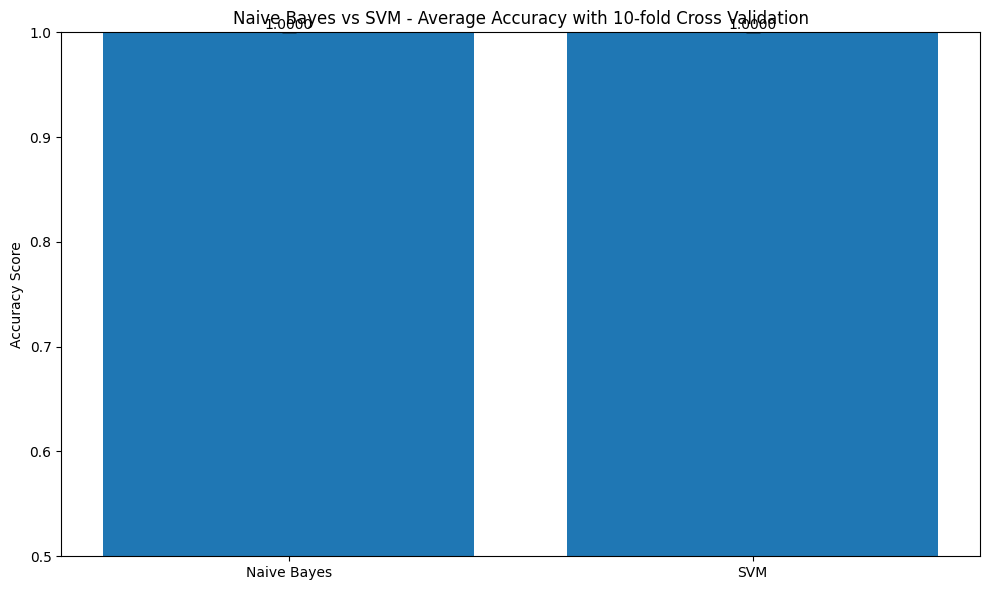

In [103]:
# Train Naive Bayes and SVM models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Initialize models
nb = GaussianNB()
svm = SVC(random_state=42)

# Perform 10-fold cross validation
models_comparison = {
    'Naive Bayes': nb,
    'SVM': svm
}

mean_scores = {}
std_scores = {}

for name, model in models_comparison.items():
    scores = cross_val_score(model, X_pca_final, y, cv=10, scoring='accuracy')
    mean_scores[name] = scores.mean()
    std_scores[name] = scores.std()
    print(f"{name} - Mean Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Create bar plot comparing Naive Bayes and SVM
plt.figure(figsize=(10, 6))
models_names = list(mean_scores.keys())
accuracy_scores = list(mean_scores.values())
error = list(std_scores.values())

# Create bar plot with error bars
bars = plt.bar(models_names, accuracy_scores, yerr=error, capsize=5)

# Customize the plot
plt.title('Naive Bayes vs SVM - Average Accuracy with 10-fold Cross Validation')
plt.ylabel('Accuracy Score')
plt.ylim(0.5, 1.0)  # Set y-axis limit from 0.5 to 1.0 for better visualization

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


KNN - Mean Accuracy: 0.9944 (+/- 0.0050)
Logistic Regression - Mean Accuracy: 1.0000 (+/- 0.0000)
Naive Bayes - Mean Accuracy: 1.0000 (+/- 0.0000)
SVM - Mean Accuracy: 1.0000 (+/- 0.0000)
Decision Tree - Mean Accuracy: 0.9212 (+/- 0.0294)
Random Forest - Mean Accuracy: 0.9984 (+/- 0.0024)


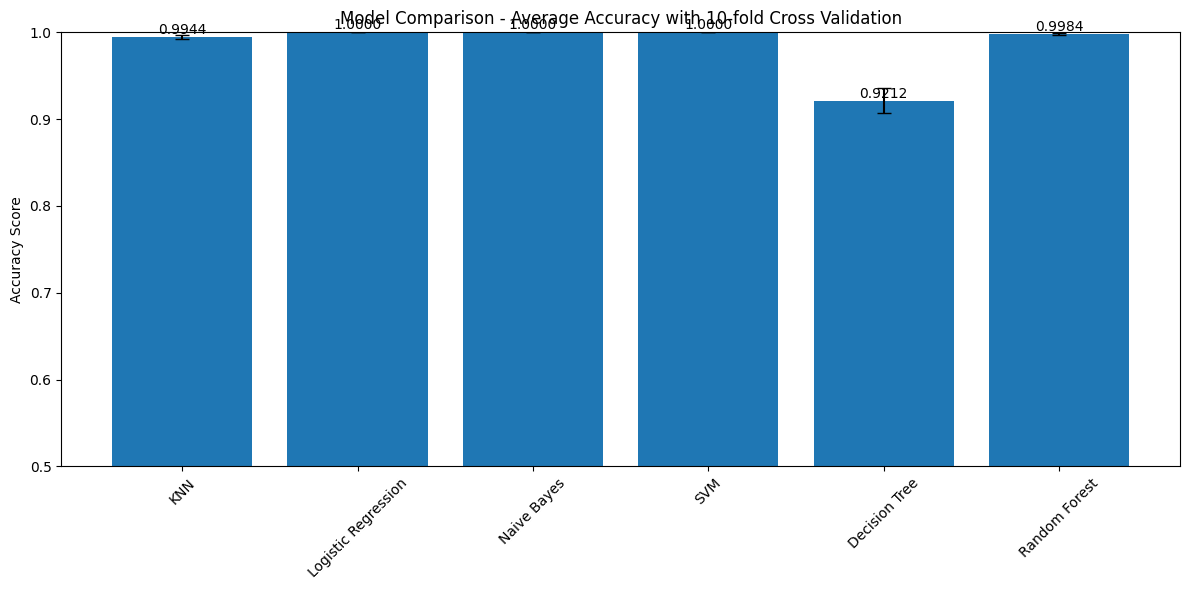

In [104]:
# Initialize all models
models_comparison = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Perform 10-fold cross validation for all models
mean_scores = {}
std_scores = {}

for name, model in models_comparison.items():
    scores = cross_val_score(model, X_pca_final, y, cv=10, scoring='accuracy')
    mean_scores[name] = scores.mean()
    std_scores[name] = scores.std()
    print(f"{name} - Mean Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Create bar plot comparing all models
plt.figure(figsize=(12, 6))
models_names = list(mean_scores.keys())
accuracy_scores = list(mean_scores.values())
error = list(std_scores.values())

# Create bar plot with error bars
bars = plt.bar(models_names, accuracy_scores, yerr=error, capsize=5)

# Customize the plot
plt.title('Model Comparison - Average Accuracy with 10-fold Cross Validation')
plt.ylabel('Accuracy Score')
plt.ylim(0.5, 1.0)  # Set y-axis limit from 0.5 to 1.0 for better visualization
plt.xticks(rotation=45)  # Rotate x-labels for better readability

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


Meta Model - Mean Accuracy: 1.0000 (+/- 0.0000)


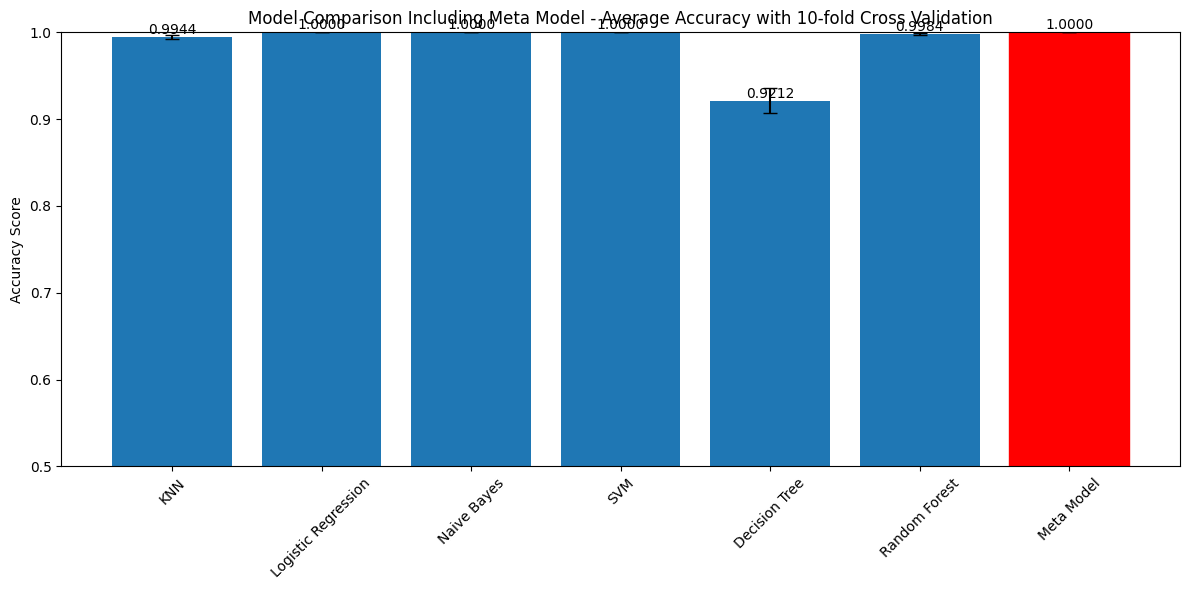

In [105]:
# Create a meta model using VotingClassifier
meta_model = VotingClassifier(
    estimators=[
        ('knn', KNeighborsClassifier()),
        ('lr', LogisticRegression(random_state=42)),
        ('nb', GaussianNB()),
        ('svm', SVC(random_state=42, probability=True)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ],
    voting='soft'
)

# Perform 10-fold cross validation for meta model
meta_scores = cross_val_score(meta_model, X_pca_final, y, cv=10, scoring='accuracy')
meta_mean = meta_scores.mean()
meta_std = meta_scores.std()

print(f"Meta Model - Mean Accuracy: {meta_mean:.4f} (+/- {meta_std * 2:.4f})")

# Add meta model results to previous scores
mean_scores['Meta Model'] = meta_mean
std_scores['Meta Model'] = meta_std

# Create updated bar plot comparing all models including meta model
plt.figure(figsize=(12, 6))
models_names = list(mean_scores.keys())
accuracy_scores = list(mean_scores.values())
error = list(std_scores.values())

# Create bar plot with error bars
bars = plt.bar(models_names, accuracy_scores, yerr=error, capsize=5)

# Customize the plot
plt.title('Model Comparison Including Meta Model - Average Accuracy with 10-fold Cross Validation')
plt.ylabel('Accuracy Score')
plt.ylim(0.5, 1.0)  # Set y-axis limit from 0.5 to 1.0 for better visualization
plt.xticks(rotation=45)  # Rotate x-labels for better readability

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# Highlight meta model bar
bars[-1].set_color('red')

plt.tight_layout()
plt.show()
